### Este arquivo foi criado para fazer um levantamento de dados dos backtestes do modelo Moneta. Esses dados são utilizados para definir os ``melhores parâmetros`` para o Moneta.

In [1]:
# o pacote abaixo foi criado para encontrar os resultados de Sharpe, Beta e Drawdown de cada carteira
from utilidades.performance_tracker import PerformanceTracker

# a função abaixo foi criada para executar os backtestes do moneta
from modelo.backtestes import moneta_backtestes

# as ações contidas no arquivo abaixo foram definidas manualmente escolhendo as ações com maior liquidez e volume
from simbolos import simbolos

# a classe 'product' serve para fazer o produto cartesiano entre os parâmetros de entrada
from itertools import product

# foi importada a classe 'date' para usar recursos de datas
from datetime import date

# numpy é um pacote que é usado, principalmente, para fazer cálculos numéricos
import numpy as np

# pandas é um pacote que é usado, principalmente, para manipular dados tabulares
import pandas as pd

# a função busca_cotacoes foi criada para buscar as cotações das ações no Yahoo Finance
from cotacoes.cotacoes import busca_cotacoes

In [2]:
# país das ações a serem analisadas
pais = "BR"

In [3]:
# a variavel 'simbolos' é um dicionário com duas chaves: 'BR' e 'US'. Existe uma lista de ações 
# associada a cada chave contendo strings representando os tickers das ações. O primeiro ticker
# foi escolhido para ser o índice do país.
index_id = simbolos[pais][0]
index_id

'BOVA11.SA'

In [4]:
# obtendo todas as strings das ações do país (sem o índice) e imprimindo apenas as 5 primeiras (para chechar se deu certo)
# printar todas as ações pode ser muito extenso
acoes_ids = simbolos[pais][1:]
acoes_ids[:5]

['ABEV3.SA', 'AGRO3.SA', 'ALPA3.SA', 'ALUP11.SA', 'ANIM3.SA']

In [5]:
# abaixo, são as datas de início de cada backteste (campeonato)
colecao_comecos = [date(2018, 3, 15), date(2019, 3, 15), date(2020, 3, 15), date(2020, 10, 15)]

# abaixo, são as datas de fim de cada backteste (campeonato)
colecao_finais = [date(2021, 4, 20), date(2021, 10, 20), date(2022, 4, 20), date(2022, 10, 20)]

In [6]:
# abaixo, são as copnfiguracoes dos valores de 'cotacoes_segurar'.
colecao_cotacoes_segurar = [400, 500]
colecao_cotacoes_segurar

[400, 500]

In [7]:
# abaixo, são as copnfiguracoes dos valores de 'cotacoes_anteriores'.
colecao_cotacoes_anteriores = [100, 150]
colecao_cotacoes_anteriores

[100, 150]

In [8]:
# abaixo, são as configuracoes dos valores de 'maiores_medias'.
colecao_maiores_medias = [10, 20]
colecao_maiores_medias

[10, 20]

In [9]:
# abaixo, são as configuracoes dos valores de 'intervalos'.
# recomendo que realize apenas backtestes de intervalo 'd' (diário) ou apenas de intervalo 'w' (semanal)
colecao_intervalos = ["d"]
colecao_intervalos

['d']

In [10]:
# min(colecao_comecos) - é uma data!!!
# max(colecao_cotacoes_anteriores)
# pd.Timedelta(days=max(colecao_cotacoes_anteriores))
# min(colecao_comecos) - pd.Timedelta(days=max(colecao_cotacoes_anteriores))

# a data abaixo será usada para buscar dados de cotações das ações desde uma data anterior à data de inicio dos backtestes.
data_inicio_buscar_dados = \
    min(colecao_comecos) - pd.Timedelta(days=max(colecao_cotacoes_anteriores))

data_inicio_buscar_dados

datetime.date(2017, 10, 16)

In [11]:
# a data abaixo será usada para buscar dados de cotações das ações até uma data posterior à data de fim dos backtestes.
data_final_buscar_dados = \
    max(colecao_finais) + pd.Timedelta(days=max(colecao_cotacoes_segurar))

data_final_buscar_dados

datetime.date(2024, 3, 3)

In [12]:
# buscando todos os dados das ações que poderão ser usados nos backtestes com as datas que contemplem
# as datas iniciais e finais dos backtestes. Quando 'simbolos' recebe uma lista de ações, ele retorna
# um dataframe com as cotações
df_cotacoes = busca_cotacoes(
    simbolos=acoes_ids,
    intervalo="d",
    data_inicio=data_inicio_buscar_dados,
    data_fim=data_final_buscar_dados
)

[*********************100%%**********************]  114 of 114 completed


In [13]:
# buscando todos os dados do índice que poderão ser usados nos backtestes com as datas que contemplem
# as datas iniciais e finais dos backtestes. Quando 'simbolos' recebe uma lista de uma ação, ele retorna
# um series com as cotações
series_cotacoes_index = busca_cotacoes(
    simbolos=[index_id],
    intervalo="d",
    data_inicio=data_inicio_buscar_dados,
    data_fim=data_final_buscar_dados
)

[*********************100%%**********************]  1 of 1 completed


In [14]:
# mostrando a quantidade de linhas (datas) e colunas (ações) do dataframe de cotações
df_cotacoes.shape

(1584, 114)

In [15]:
# mostrando a quantidade de linhas (datas) do series de cotações
series_cotacoes_index.shape

(1561,)

### Perceber, que é possível (muito provavel com a API do YFinance) que os dados das ações possuem cotações em datas ``inexistentes`` no 'series' de cotações do índice, e vice-versa. Por isso, é necessário fazer um tratamento de dados para que as cotações estejam ``alinhadas``.

In [16]:
# obtendo a intersecção entre as datas do dataframe de cotações das ações e as datas do series de cotações do índice
datas_comuns = \
    df_cotacoes.index.intersection(series_cotacoes_index.index)

datas_comuns

DatetimeIndex(['2017-10-16', '2017-10-17', '2017-10-18', '2017-10-19',
               '2017-10-20', '2017-10-23', '2017-10-24', '2017-10-25',
               '2017-10-26', '2017-10-27',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', name='Date', length=1561, freq=None)

In [17]:
# filtrando o dataframe de cotações das ações e o series de cotações do índice para conter apenas as datas em comum
df_cotacoes = df_cotacoes.loc[datas_comuns]
series_cotacoes_index = series_cotacoes_index.loc[datas_comuns]

In [18]:
# mostrando a quantidade de linhas (datas) do dataframe de 
# cotações e do series de cotações após a filtragem (estarão igualadas)
df_cotacoes.shape, series_cotacoes_index.shape

((1561, 114), (1561,))

In [19]:
# a lista vazia é criada para armazenzar os resultados de cada backteste (campeonato)
resultados_campeonatos = []

In [20]:
# antes de criar um laço de repetição (while ou for), é uma boa prática fazer um laço de repetição manual.
# ou seja, um indice inicia em '0' para percorrer cada elemento das coleções de começos, finais, intervalos, etc.
comeco_campeonato = colecao_comecos[0]
final_campeonato = colecao_finais[0]
intervalo = colecao_intervalos[0]
cotacoes_anteriores = colecao_cotacoes_anteriores[0]
cotacoes_segurar = colecao_cotacoes_segurar[0]
maiores_medias = colecao_maiores_medias[0]

In [21]:
# a quantidade de bebados representa a quantidade de carteiras aleatórias que devem ser criadas para disputar o campeonato
qtd_bebados = 100

In [22]:
# chamando a função para executar o backteste do moneta e dos 'bebados'
resultado_campeonato = moneta_backtestes(
    data_inicial_bt=comeco_campeonato,
    data_final_bt=final_campeonato,
    intervalo=intervalo,
    cotacoes_anteriores=cotacoes_anteriores,
    cotacoes_segurar=cotacoes_segurar,
    maiores_medias=maiores_medias,
    qtd_bebados=qtd_bebados,
    cotacoes=df_cotacoes,
    cotacoes_index=series_cotacoes_index
)

Rodando Backteste do Moneta: 2019-04-20
Rodando Backteste do Moneta: 2020-05-25
Rodando Backteste do Moneta: 2021-06-30


<Axes: >

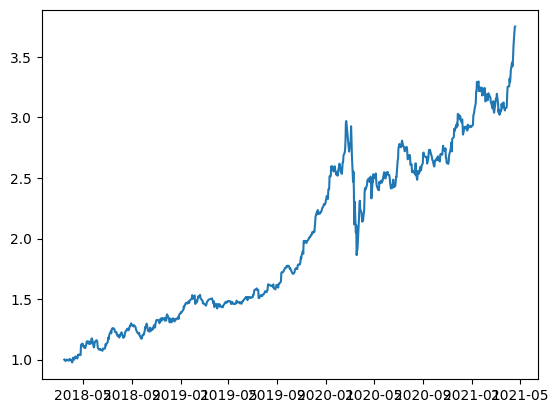

In [23]:
# a variável 'resultado_campeonato' é um dicionário no seguinte formato:
# {
#         "acumulados": {"moneta": pd.series,
#                        "index": pd.series,
#                        "bebados": lista de pd.series},
#         "variacoes": {"moneta": pd.series,
#                       "index": pd.series},
#         "dados": lista de dicionários com informações de cada carteira 'jogo' dentro do backteste 'campeonato'
# }

# para visualizar o o resultado acumulado das carteiras do moneta no período testado
resultado_campeonato["acumulados"]["moneta"].plot()

In [28]:
# a função abaixo foi criada para encontrar o quartil de cada carteira (Moneta, Índice e Bebados) para cada dia do backteste
def gerar_quartis(patrimonio_acum_moneta, 
                  patrimonio_acum_index, 
                  patrimonios_aleatorios):
    """
    patrimonio_acum_moneta: patrimônio acumulado da carteira Moneta
    patrimonio_acum_index: patrimônio acumulado do índice BOVA11
    patrimonios_aleatorios: patrimônio acumulado das carteiras aleatórias
    size: quantidade de carteiras aleatórias para retornar os quartis
    Esta função retorna os quartis para o patrimônio acumulado da carteira Moneta, 
    do índice BOVA11 e das carteiras aleatórias
    """

    n_aleatorios = len(patrimonios_aleatorios)

    # cria um array com zeros (inicialmente) para armazenar o acumulado de todas as carteiras (Moneta, Índice e Bebados)
    arr = np.zeros(shape=(len(patrimonios_aleatorios) + 2, 
                          len(patrimonio_acum_moneta)), dtype=np.float64)
    
    # preenche a primeira linha do array com o patrimônio acumulado da carteira Moneta
    arr[0, :] = patrimonio_acum_moneta

    # preenche a segunda linha do array com o patrimônio acumulado do índice BOVA11
    arr[1, :] = patrimonio_acum_index

    # preenche as linhas restantes do array com o patrimônio acumulado das carteiras aleatórias
    for i, cumprod_aleatorios in enumerate(patrimonios_aleatorios, 2):
        arr[i:, :] = cumprod_aleatorios

    # encontra a posição de cada dia do backteste para cada carteira (Moneta, Índice e Bebados)
    asort = np.argsort(arr[:, 1:], axis=0)

    
    quartis_moneta = np.quantile(n_aleatorios + 2 - np.where(asort == 0)[0], 
                                 q=[0.25, 0.5, 0.75])
    # quartis_bova = np.quantile(n_aleatorios + 2 - np.where(asort == 1)[0], 
    #                            q=[0.25, 0.5, 0.75])

    return quartis_moneta# , quartis_bova

In [29]:
# gerando os quartis para o patrimônio acumulado da carteira Moneta
quartis_moneta = \
    gerar_quartis(
        patrimonio_acum_moneta=resultado_campeonato["acumulados"]["moneta"],
        patrimonio_acum_index=resultado_campeonato["acumulados"]["index"],
        patrimonios_aleatorios=resultado_campeonato["acumulados"]["bebados"]
        )

In [30]:
# mostrando os quartis das posições do patrimônio acumulado da carteira Moneta em comparação 
# com o índice BOVA11 e as carteiras aleatórias
quartis_moneta

array([1., 1., 2.])

In [31]:
# a classe 'PerformanceTracker' foi criada para encontrar o resultado de Sharpe, Beta e Drawdown da carteira Moneta
tracker = PerformanceTracker(
    data_returns=resultado_campeonato["variacoes"]["moneta"],
    market_returns=resultado_campeonato["variacoes"]["index"],
    period="d"
)

In [32]:
sharpe_moneta = tracker.sharpe_ratio()
beta_moneta = tracker.portfolio_beta()
max_drawdown_moneta = tracker.max_drawdown()

In [33]:
combinacoes = list(product(
    colecao_comecos,
    colecao_finais,
    colecao_cotacoes_anteriores,
    colecao_cotacoes_segurar,
    colecao_intervalos,
    colecao_maiores_medias
))

resultados_campeonatos = []
for i, combinacao in enumerate(combinacoes):

    print(f"{i + 1}/{len(combinacoes)}")

    comeco_campeonato = combinacao[0]
    final_campeonato = combinacao[1]
    cotacoes_anteriores = combinacao[2]
    cotacoes_segurar = combinacao[3]
    intervalo = combinacao[4]
    maiores_medias = combinacao[5]

    resultado_campeonato = moneta_backtestes(
        data_inicial_bt=comeco_campeonato,
        data_final_bt=final_campeonato,
        intervalo=intervalo,
        cotacoes_anteriores=cotacoes_anteriores,
        cotacoes_segurar=cotacoes_segurar,
        maiores_medias=maiores_medias,
        qtd_bebados=qtd_bebados,
        cotacoes=df_cotacoes,
        cotacoes_index=series_cotacoes_index
    )

    quartis_moneta = gerar_quartis(
        patrimonio_acum_moneta=resultado_campeonato["acumulados"]["moneta"],
        patrimonio_acum_index=resultado_campeonato["acumulados"]["index"],
        patrimonios_aleatorios=resultado_campeonato["acumulados"]["bebados"]
        )

    tracker = PerformanceTracker(
    data_returns=resultado_campeonato["variacoes"]["moneta"],
    market_returns=resultado_campeonato["variacoes"]["index"],
    period="d"
    )
    
    sharpe_moneta = tracker.sharpe_ratio()
    beta_moneta = tracker.portfolio_beta()
    max_drawdown_moneta = tracker.max_drawdown()

    dados_registrar = {
        "data_inicio": comeco_campeonato, "data_fim": final_campeonato,
        "cotacoes_segurar": cotacoes_segurar,
        "maiores_medias": maiores_medias,
        "cotacoes_anteriores": cotacoes_anteriores,
        "intervalo": intervalo,
        "q1_moneta": quartis_moneta[0], "q2_moneta": quartis_moneta[1], "q3_moneta": quartis_moneta[2],
        "patrimonio_final_moneta": resultado_campeonato["acumulados"]["moneta"].iloc[-1],
        f"patrimonio_final_{index_id}": resultado_campeonato["acumulados"]["index"].iloc[-1],
        "sharpe_moneta": sharpe_moneta,
        "beta_moneta": beta_moneta,
        "max_drawdown_moneta": -1 * max_drawdown_moneta
    }

    resultados_campeonatos.append(dados_registrar)

1/128
Rodando Backteste do Moneta: 2019-04-20
Rodando Backteste do Moneta: 2020-05-25
Rodando Backteste do Moneta: 2021-06-30
2/128
Rodando Backteste do Moneta: 2019-04-20
Rodando Backteste do Moneta: 2020-05-25
Rodando Backteste do Moneta: 2021-06-30
3/128
Rodando Backteste do Moneta: 2019-07-29
Rodando Backteste do Moneta: 2020-12-11
Rodando Backteste do Moneta: 2022-04-26
4/128
Rodando Backteste do Moneta: 2019-07-29
Rodando Backteste do Moneta: 2020-12-11
Rodando Backteste do Moneta: 2022-04-26
5/128
Rodando Backteste do Moneta: 2019-04-20
Rodando Backteste do Moneta: 2020-05-25
Rodando Backteste do Moneta: 2021-06-30
6/128
Rodando Backteste do Moneta: 2019-04-20
Rodando Backteste do Moneta: 2020-05-25
Rodando Backteste do Moneta: 2021-06-30
7/128
Rodando Backteste do Moneta: 2019-07-29
Rodando Backteste do Moneta: 2020-12-11
Rodando Backteste do Moneta: 2022-04-26
8/128
Rodando Backteste do Moneta: 2019-07-29
Rodando Backteste do Moneta: 2020-12-11
Rodando Backteste do Moneta: 202

In [34]:
df_resultados = pd.DataFrame(resultados_campeonatos)
df_resultados.shape

(128, 14)

In [35]:
df_resultados

,data_inicio,data_fim,cotacoes_segurar,maiores_medias,cotacoes_anteriores,intervalo,q1_moneta,q2_moneta,q3_moneta,patrimonio_final_moneta,patrimonio_final_BOVA11.SA,sharpe_moneta,beta_moneta,max_drawdown_moneta
0,2018-03-15,2021-04-20,400,10,100,d,1.0,1.0,2.0,3.873167,1.361181,2.073292,0.547222,-37.288142
1,2018-03-15,2021-04-20,400,20,100,d,2.0,4.0,9.0,2.442734,1.361181,1.319348,0.449262,-31.531331
2,2018-03-15,2021-04-20,500,10,100,d,1.0,1.0,2.0,3.233848,1.400159,1.250467,0.961196,-53.859030
3,2018-03-15,2021-04-20,500,20,100,d,4.0,5.0,7.0,3.047266,1.400159,1.555446,0.766748,-41.720487
4,2018-03-15,2021-04-20,400,10,150,d,1.0,1.0,3.0,2.312771,1.361181,0.941034,0.688835,-46.316148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2020-10-15,2022-10-20,500,20,100,d,2.0,2.0,3.0,2.102048,1.160734,2.300377,0.663973,-19.700791
124,2020-10-15,2022-10-20,400,10,150,d,6.0,25.5,73.0,1.152029,1.196599,0.366762,0.557705,-29.958013
125,2020-10-15,2022-10-20,400,20,150,d,2.0,2.0,7.0,1.479979,1.196599,1.460522,0.426831,-15.711795
126,2020-10-15,2022-10-20,500,10,150,d,7.0,27.0,79.0,1.274269,1.160734,0.570891,0.732323,-36.499161


In [36]:
# funcao objetivo para pontuar os resultados resumidos de cada configuracao de moneta
def fo(media_quartis, media_patrimonio, 
       media_vs_index, media_sharpe, media_beta, media_max_drawdown,
       a, b, c, d, e, f):
    
    return a * media_quartis + \
            b * media_patrimonio + \
            c * media_vs_index + \
            d * media_sharpe + \
            e * media_beta + \
            f * media_max_drawdown

In [38]:
# para a configuracao 'd', 250 cotacoes segurar, 10 maiores medias, 150 cotacoes anteriores
df_comb = \
    df_resultados.loc[(df_resultados["intervalo"] == "d") & 
                        (df_resultados["cotacoes_segurar"] == 400) & 
                        (df_resultados["maiores_medias"] == 10) & 
                        (df_resultados["cotacoes_anteriores"] == 150)]
df_comb.reset_index(drop=True)

,data_inicio,data_fim,cotacoes_segurar,maiores_medias,cotacoes_anteriores,intervalo,q1_moneta,q2_moneta,q3_moneta,patrimonio_final_moneta,patrimonio_final_BOVA11.SA,sharpe_moneta,beta_moneta,max_drawdown_moneta
0,2018-03-15,2021-04-20,400,10,150,d,1.0,1.0,3.0,2.312771,1.361181,0.941034,0.688835,-46.316148
1,2018-03-15,2021-10-20,400,10,150,d,2.0,4.0,8.0,2.326613,1.259302,0.835199,0.690607,-46.534983
2,2018-03-15,2022-04-20,400,10,150,d,2.0,4.0,8.0,2.635279,1.302502,0.895997,0.673809,-44.964607
3,2018-03-15,2022-10-20,400,10,150,d,1.0,2.0,7.0,2.641101,1.332851,0.782519,0.690010,-45.924225
4,2019-03-15,2021-04-20,400,10,150,d,5.0,32.0,77.0,1.626521,1.247166,0.894161,0.467659,-40.758815
5,2019-03-15,2021-10-20,400,10,150,d,7.0,23.0,66.0,1.861022,1.157450,0.941820,0.494410,-39.602338
6,2019-03-15,2022-04-20,400,10,150,d,5.0,12.0,57.0,2.257399,1.197156,1.107137,0.514487,-41.234117
7,2019-03-15,2022-10-20,400,10,150,d,2.0,5.0,31.0,2.471139,1.241087,1.068841,0.504405,-41.586117
8,2020-03-15,2021-04-20,400,10,150,d,88.0,101.0,101.0,1.288195,1.700877,0.851655,0.464176,-24.254029
9,2020-03-15,2021-10-20,400,10,150,d,97.0,101.0,102.0,1.407153,1.567140,0.817082,0.496420,-24.571811


In [47]:
# Pontuando os dados de Quartis

# df_comb.loc[:, ["q1_moneta", "q2_moneta", "q3_moneta"]]
# df_comb.loc[:, ["q1_moneta", "q2_moneta", "q3_moneta"]].mean()
# df_comb.loc[:, ["q1_moneta", "q2_moneta", "q3_moneta"]].mean().mean()
# qtd_bebados - df_comb.loc[:, ["q1_moneta", "q2_moneta", "q3_moneta"]].mean().mean()
(qtd_bebados - df_comb.loc[:, ["q1_moneta", "q2_moneta", "q3_moneta"]].mean().mean()) / qtd_bebados

np.float64(0.6436458333333335)

In [55]:
# Pontuando os dados de Patrimônio Final

# df_comb["patrimonio_final_moneta"]
# df_resultados["patrimonio_final_moneta"].max()
# df_comb["patrimonio_final_moneta"] / df_resultados["patrimonio_final_moneta"].max()
(df_comb["patrimonio_final_moneta"] / df_resultados["patrimonio_final_moneta"].max()).mean()

np.float64(0.4671474440348725)

In [60]:
# Pontuando os dados de Patrimônio Final Moneta vs. Patrimônio Final BOVA

# df_comb["patrimonio_final_moneta"]
# df_comb[f"patrimonio_final_{index_id}"]
# df_comb["patrimonio_final_moneta"] / df_comb[f"patrimonio_final_{index_id}"]
# (df_resultados["patrimonio_final_moneta"] / df_resultados[f"patrimonio_final_{index_id}"]).max()
# df_comb["patrimonio_final_moneta"] / df_comb[f"patrimonio_final_{index_id}"] / \
#     (df_resultados["patrimonio_final_moneta"] / df_resultados[f"patrimonio_final_{index_id}"]).max()

(df_comb["patrimonio_final_moneta"] / df_comb[f"patrimonio_final_{index_id}"] / \
    (df_resultados["patrimonio_final_moneta"] / df_resultados[f"patrimonio_final_{index_id}"]).max()).mean()

np.float64(0.49153493731920145)

In [75]:
# Pontuando os dados de Sharpe do Moneta

# df_comb["sharpe_moneta"]
# 1.1 ** df_comb["sharpe_moneta"]
# (1.1 ** df_resultados["sharpe_moneta"]).max()
# (1.1 ** df_comb["sharpe_moneta"]) / (1.1 ** df_resultados["sharpe_moneta"]).max()
(1.1 ** df_comb["sharpe_moneta"] / (1.1 ** df_resultados["sharpe_moneta"]).max()).mean()

np.float64(0.4698371572498597)

In [84]:
# Pontuando os dados de Beta do Moneta

# df_comb["beta_moneta"]
# df_resultados["beta_moneta"].max()
# (df_comb["beta_moneta"] / df_resultados["beta_moneta"].max()).rename("beta_moneta_normalizado")
# (df_comb["beta_moneta"] / df_resultados["beta_moneta"].max()).mean()
1 - (df_comb["beta_moneta"] / df_resultados["beta_moneta"].max()).mean()

np.float64(0.43114147917403833)

In [108]:
# Pontuando os dados de MaxDrawDown do Moneta

# df_comb["max_drawdown_moneta"]
# df_resultados["max_drawdown_moneta"].max()
# ((df_comb["max_drawdown_moneta"]) / (df_resultados["max_drawdown_moneta"]).max()).rename("max_drawdown_moneta_normalizado")
# ((df_comb["max_drawdown_moneta"]) / (df_resultados["max_drawdown_moneta"]).max()).mean()
1 - (df_comb["max_drawdown_moneta"] / df_resultados["max_drawdown_moneta"].max()).mean()

np.float64(0.47577210173331164)

In [103]:
# juntando todas as pontuações
fo(media_quartis=0.64,
   media_patrimonio=0.46,
   media_vs_index=0.49,
   media_sharpe=0.46,
   media_beta=0.57,
   media_max_drawdown=0.48,
   a=1, b=1, c=1, d=1, e=1, f=1)

3.1

In [109]:
def gerar_ranking(df_resultados: pd.DataFrame, qtd_aleatorios: int, index_id: str,
                  cols: list = ["cotacoes_segurar", "maiores_medias", 
                                "cotacoes_anteriores", "intervalo"]):
    """
    df_resultados: DataFrame com os resultados dos backtests
    qtd_aleatorios: quantidade de carteiras aleatórias
    index_id: índice a ser comparado (BOVA11.SA ou ^GSPC)
    cols: colunas para agrupar

    Esta função gera o ranking das combinações de parâmetros
    """

    # agrupando os resultados de todos os campeonatos por combinação de parâmetros
    grouped = df_resultados.groupby(cols)
    
    # ranking será uma lista de dicionários com a pontuação geral de cada combinação de parâmetros
    ranking = []
    for comb, df_comb in grouped:

        # pontuando os dados de Quartis        
        pontuacao_quartis = \
            ((2 + qtd_aleatorios) - df_resultados.loc[:, ["q1_moneta", "q2_moneta", "q3_moneta"]].mean().mean()) / \
                (2 + qtd_aleatorios)
        
        # pontuando os dados de Patrimônio Final
        pontuacao_patrimonio = (df_comb["patrimonio_final_moneta"] / \
                                df_resultados["patrimonio_final_moneta"].max()).mean()

        # pontuando os dados de Patrimônio Final Moneta vs. Patrimônio Final Índice
        pontuacao_vs_index = (df_comb["patrimonio_final_moneta"] / df_comb[f"patrimonio_final_{index_id}"] / \
        (df_resultados["patrimonio_final_moneta"] / df_resultados[f"patrimonio_final_{index_id}"]).max()).mean()
        
        # pontuando os dados de Sharpe do Moneta
        pontuacao_sharpe = (1.1 ** df_comb["sharpe_moneta"] / \
                            (1.1 ** df_resultados["sharpe_moneta"]).max()).mean()

        # pontuando os dados de Beta do Moneta
        pontuacao_beta = 1 - (df_comb["beta_moneta"] / df_resultados["beta_moneta"].max()).mean()

        pontuacao_max_drawdown = 1 - (df_comb["max_drawdown_moneta"] / \
                                      df_resultados["max_drawdown_moneta"].max()).mean()

        # calculando a função objetivo com importância igual para todos os critérios
        ob = fo(pontuacao_quartis, pontuacao_patrimonio, pontuacao_vs_index, 
                pontuacao_sharpe, pontuacao_beta, pontuacao_max_drawdown,
                1, 1, 1, 1, 1, 1)     

        # registra a pontuação geral de cada combinação de parâmetros
        ranking.append({
            "indice_comb": i,
            "cotacoes_segurar": comb[0],
            "maiores_medias": comb[1],
            "cotacoes_anteriores": comb[2],
            "intervalo": comb[3],
            "media_quartis": pontuacao_quartis,
            "media_patrimonio": pontuacao_patrimonio,
            "media_vs_index": pontuacao_vs_index,
            "media_sharpe": pontuacao_sharpe,
            "media_beta": pontuacao_beta,
            "media_max drawdown": pontuacao_max_drawdown,
            "fo": ob
        })

    # transforma a lista de dicionários em um DataFrame
    df_final = pd.DataFrame(ranking).sort_values(by="fo", ascending=False).reset_index(drop=True)

    # normaliza a função objetivo para que fique entre 0 e 10
    df_final["fo_ajustada"] = 10 * (df_final["fo"] - df_final["fo"].min()) / \
                                    (df_final["fo"].max() - df_final["fo"].min())
    
    # retorna o DataFrame com o ranking
    return df_final

In [110]:
# passa o DataFrame de resultados de todos os campeonatos
# para a função 'gerar_ranking' e armazena o resultado em 'df_ranking'
df_ranking = gerar_ranking(df_resultados=df_resultados,
                        qtd_aleatorios=qtd_bebados,
                        index_id=index_id)
df_ranking

,indice_comb,cotacoes_segurar,maiores_medias,cotacoes_anteriores,intervalo,media_quartis,media_patrimonio,media_vs_index,media_sharpe,media_beta,media_max drawdown,fo,fo_ajustada
0,127,400,20,150,d,0.623848,0.526912,0.558193,0.499064,0.572610,0.586971,3.367598,10.000000
1,127,400,20,100,d,0.623848,0.504960,0.534274,0.517779,0.543652,0.565561,3.290073,8.774231
2,127,500,20,150,d,0.623848,0.523963,0.551817,0.496859,0.497080,0.541356,3.234923,7.902226
3,127,500,20,100,d,0.623848,0.545418,0.575436,0.516314,0.440627,0.526507,3.228149,7.795128
4,127,400,10,100,d,0.623848,0.469534,0.488372,0.471685,0.468078,0.446299,2.967816,3.678894
5,127,400,10,150,d,0.623848,0.467147,0.491535,0.469837,0.431141,0.475772,2.959281,3.543947
6,127,500,10,150,d,0.623848,0.469079,0.494530,0.467732,0.339274,0.429547,2.824010,1.405130
7,127,500,10,100,d,0.623848,0.474330,0.490956,0.464559,0.314276,0.367173,2.735142,0.000000


In [111]:
# mostrando apenas algumas colunas do ranking
df_ranking.loc[:, 
["cotacoes_segurar", "maiores_medias", "cotacoes_anteriores", "intervalo", "fo", "fo_ajustada"]]

,cotacoes_segurar,maiores_medias,cotacoes_anteriores,intervalo,fo,fo_ajustada
0,400,20,150,d,3.367598,10.000000
1,400,20,100,d,3.290073,8.774231
2,500,20,150,d,3.234923,7.902226
3,500,20,100,d,3.228149,7.795128
4,400,10,100,d,2.967816,3.678894
5,400,10,150,d,2.959281,3.543947
6,500,10,150,d,2.824010,1.405130
7,500,10,100,d,2.735142,0.000000
